In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
train_file = "data/train.csv"

train_df = pd.read_csv(train_file)

In [9]:
test_file = "data/test.csv"

test_df = pd.read_csv(test_file)

In [3]:
train_df.shape

(20758, 18)

In [11]:
train_df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [4]:
print(train_df.describe())

                id           Age        Height        Weight          FCVC  \
count  20758.00000  20758.000000  20758.000000  20758.000000  20758.000000   
mean   10378.50000     23.841804      1.700245     87.887768      2.445908   
std     5992.46278      5.688072      0.087312     26.379443      0.533218   
min        0.00000     14.000000      1.450000     39.000000      1.000000   
25%     5189.25000     20.000000      1.631856     66.000000      2.000000   
50%    10378.50000     22.815416      1.700000     84.064875      2.393837   
75%    15567.75000     26.000000      1.762887    111.600553      3.000000   
max    20757.00000     61.000000      1.975663    165.057269      3.000000   

                NCP          CH2O           FAF           TUE  
count  20758.000000  20758.000000  20758.000000  20758.000000  
mean       2.761332      2.029418      0.981747      0.616756  
std        0.705375      0.608467      0.838302      0.602113  
min        1.000000      1.000000      0.

In [5]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [12]:
train_df.dtypes

id                                  int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

Looking for Categorical Features

In [7]:
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        print(col, train_df[col].unique())

Gender ['Male' 'Female']
family_history_with_overweight ['yes' 'no']
FAVC ['yes' 'no']
CAEC ['Sometimes' 'Frequently' 'no' 'Always']
SMOKE ['no' 'yes']
SCC ['no' 'yes']
CALC ['Sometimes' 'no' 'Frequently']
MTRANS ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']
NObeyesdad ['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


There are few binary features, while there are features which takes more than 2 levels

"NObeyesdad" is the target variable which takes 7 levels

In [8]:
binary_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

categorical_features = ['CAEC', 'CALC', 'MTRANS']

In [10]:
for col in train_df.columns:
    if col in categorical_features and col != 'NObeyesdad':
        print(col, train_df[col].unique(), test_df[col].unique())

print('NObeyesdad', train_df['NObeyesdad'].unique())

CAEC ['Sometimes' 'Frequently' 'no' 'Always'] ['Sometimes' 'Always' 'Frequently' 'no']
CALC ['Sometimes' 'no' 'Frequently'] ['Sometimes' 'no' 'Frequently' 'Always']
MTRANS ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike'] ['Public_Transportation' 'Automobile' 'Walking' 'Bike' 'Motorbike']
NObeyesdad ['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


These are the unique levels for each categorical variables with more than 2 levels

Looking for missing values/data

In [13]:
train_df.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [14]:
test_df.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

No missing values

So in total we 8 categorical features, of which 5 are binary and 3 are categorical features. We can one hot enconding for all the categorical features, separately for binary and categorical.

### Pre-Processing

In [16]:
from sklearn.preprocessing import OrdinalEncoder

In [17]:
binary_encoder = OrdinalEncoder(
    categories = [
        ['Female', 'Male'],
        ['no', 'yes'],
        ['no', 'yes'],
        ['no', 'yes'],
        ['no', 'yes']
    ]
)

train_df[binary_features] = binary_encoder.fit_transform(train_df[binary_features])
test_df[binary_features] = binary_encoder.transform(test_df[binary_features])

In [18]:
categorical_encoder = OrdinalEncoder(
    
    categories = [
        ['no', 'Sometimes', 'Frequently', 'Always'],
        ['no', 'Sometimes', 'Frequently', 'Always'],
        ['Public_Transportation', 'Automobile', 'Motorbike', 'Bike', 'Walking']
    ]
)

train_df[categorical_features] = categorical_encoder.fit_transform(train_df[categorical_features])
test_df[categorical_features] = categorical_encoder.transform(test_df[categorical_features])

In [19]:
train_df.value_counts()[1:]

id     Gender  Age        Height    Weight      family_history_with_overweight  FAVC  FCVC      NCP       CAEC  SMOKE  CH2O      SCC  FAF       TUE       CALC  MTRANS  NObeyesdad         
13826  1.0     21.012569  1.697421  100.431625  1.0                             1.0   2.000000  1.627555  1.0   0.0    1.000000  0.0  1.000000  0.460866  1.0   0.0     Obesity_Type_I         1
13844  0.0     16.496978  1.691206  82.000000   1.0                             1.0   2.668890  1.680838  1.0   0.0    1.876915  0.0  0.130417  1.796136  1.0   0.0     Obesity_Type_I         1
13843  0.0     21.024970  1.735810  131.042274  1.0                             1.0   3.000000  3.000000  1.0   0.0    1.650612  0.0  1.645532  0.912187  1.0   0.0     Obesity_Type_III       1
13842  0.0     27.000000  1.677573  77.493596   1.0                             1.0   3.000000  3.000000  1.0   0.0    1.968011  0.0  0.908981  0.753077  1.0   0.0     Overweight_Level_II    1
13841  1.0     28.992809  1.780503  104.

In [21]:
train_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,1.0,24.443011,1.699998,81.669950,1.0,1.0,2.000000,2.983297,1.0,0.0,2.763573,0.0,0.000000,0.976473,1.0,0.0,Overweight_Level_II
1,1,0.0,18.000000,1.560000,57.000000,1.0,1.0,2.000000,3.000000,2.0,0.0,2.000000,0.0,1.000000,1.000000,0.0,1.0,Normal_Weight
2,2,0.0,18.000000,1.711460,50.165754,1.0,1.0,1.880534,1.411685,1.0,0.0,1.910378,0.0,0.866045,1.673584,0.0,0.0,Insufficient_Weight
3,3,0.0,20.952737,1.710730,131.274851,1.0,1.0,3.000000,3.000000,1.0,0.0,1.674061,0.0,1.467863,0.780199,1.0,0.0,Obesity_Type_III
4,4,1.0,31.641081,1.914186,93.798055,1.0,1.0,2.679664,1.971472,1.0,0.0,1.979848,0.0,1.967973,0.931721,1.0,0.0,Overweight_Level_II


Reflects the changes by One Hot Encoding

In [22]:
train_df.dtypes

id                                  int64
Gender                            float64
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight    float64
FAVC                              float64
FCVC                              float64
NCP                               float64
CAEC                              float64
SMOKE                             float64
CH2O                              float64
SCC                               float64
FAF                               float64
TUE                               float64
CALC                              float64
MTRANS                            float64
NObeyesdad                         object
dtype: object

### Visualizations

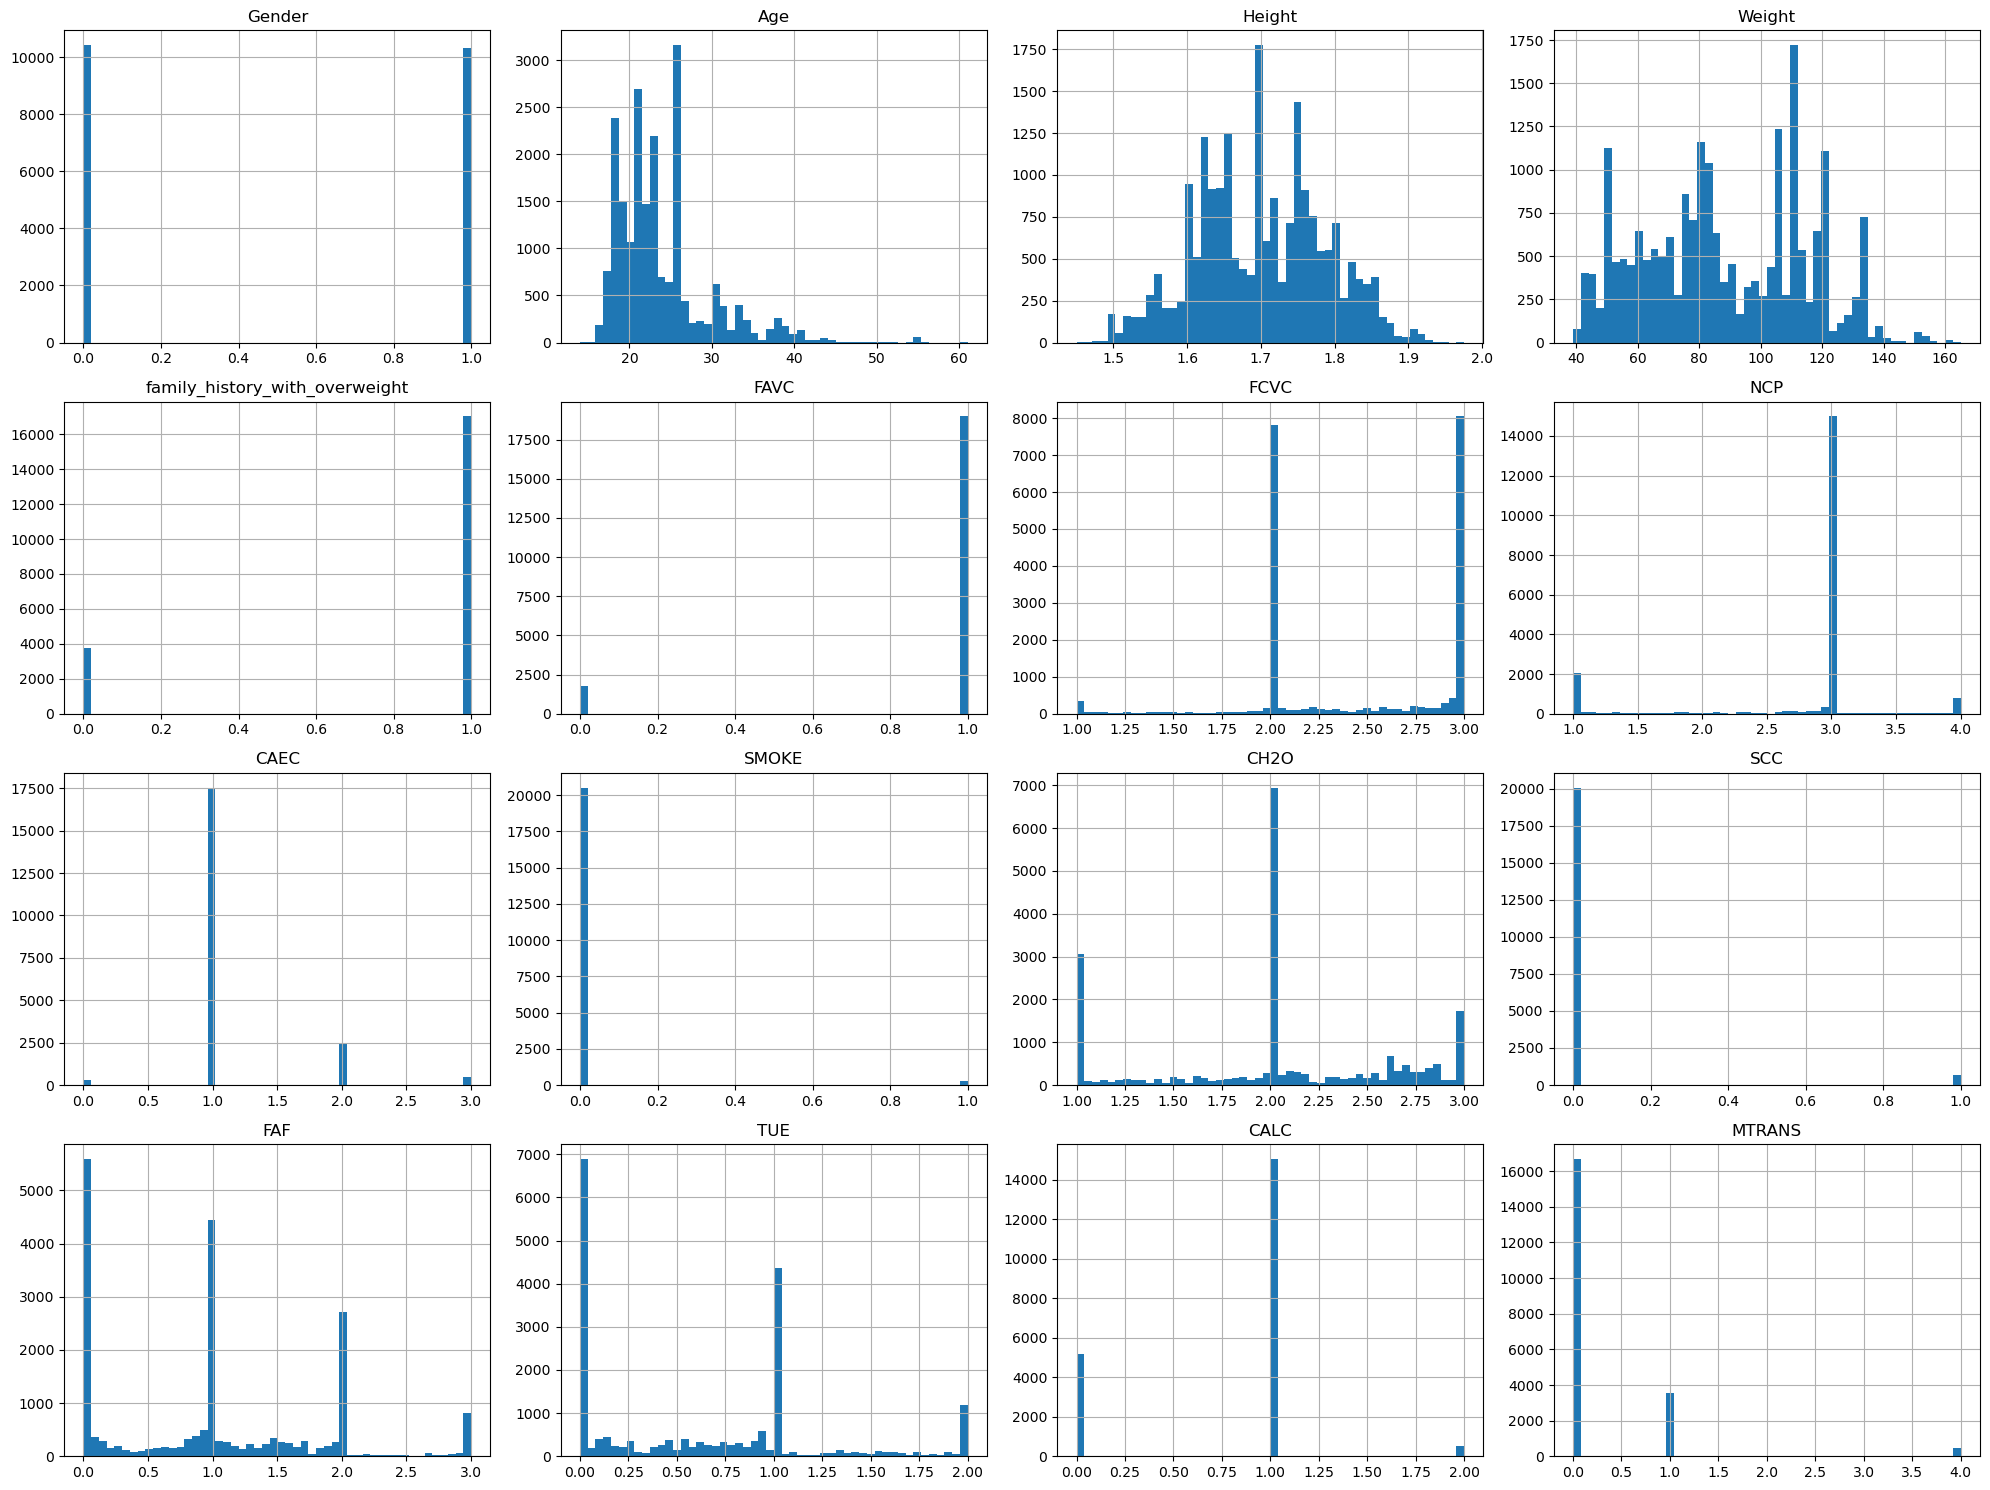

In [29]:
num_cols = train_df.select_dtypes(include='number').columns
num_cols = [col for col in num_cols if col != 'id'] 
num_cols_count = len(num_cols)

fig, axs = plt.subplots((num_cols_count + 3) // 4, 4, figsize=(20, 15))

for i, col in enumerate(num_cols):
    ax = axs[i // 4, i % 4]
    train_df[col].hist(bins=50, ax=ax)
    ax.set_title(col)

for i in range(num_cols_count, len(axs.flat)):
    axs.flat[i].set_visible(False)

plt.tight_layout()
plt.show()

Except for the age, weight, and height, all the other continous features seems to be concentrated about a very few values

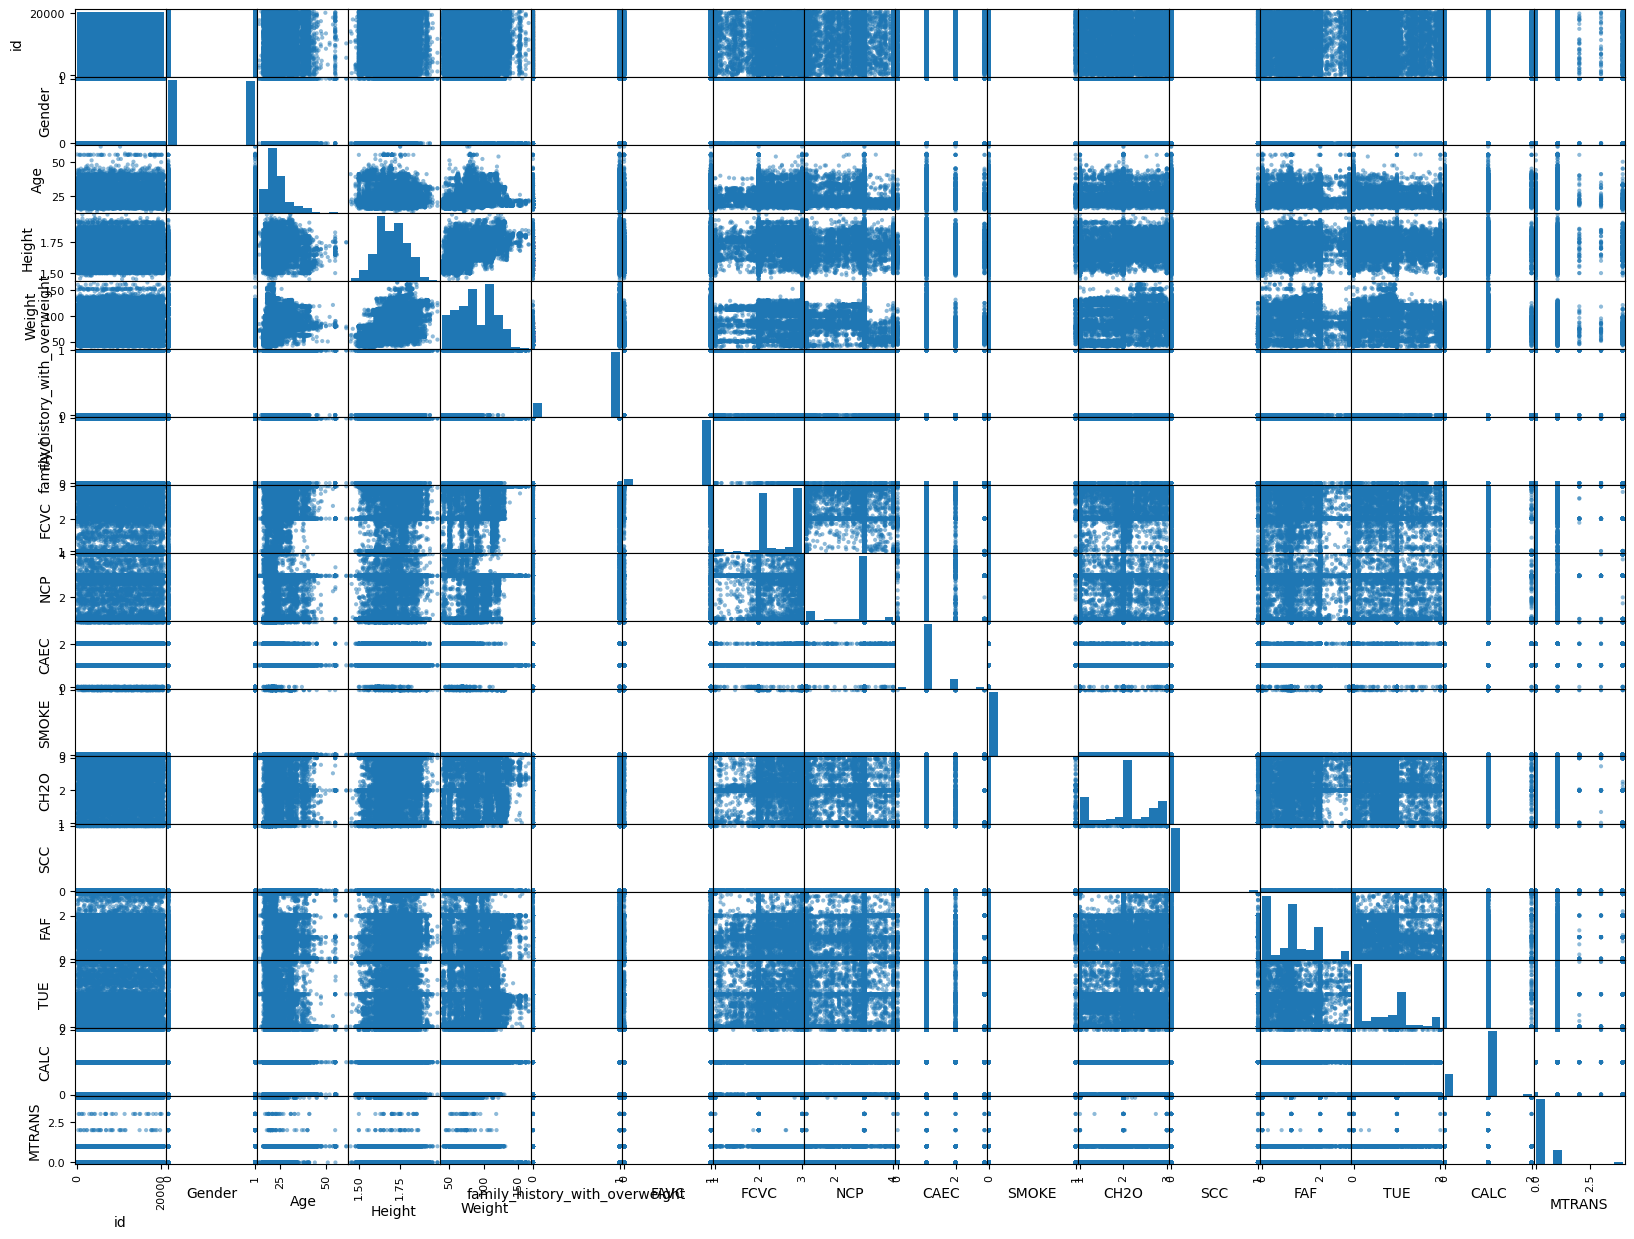

In [30]:
pd.plotting.scatter_matrix(train_df, figsize=(20, 15))
plt.show()

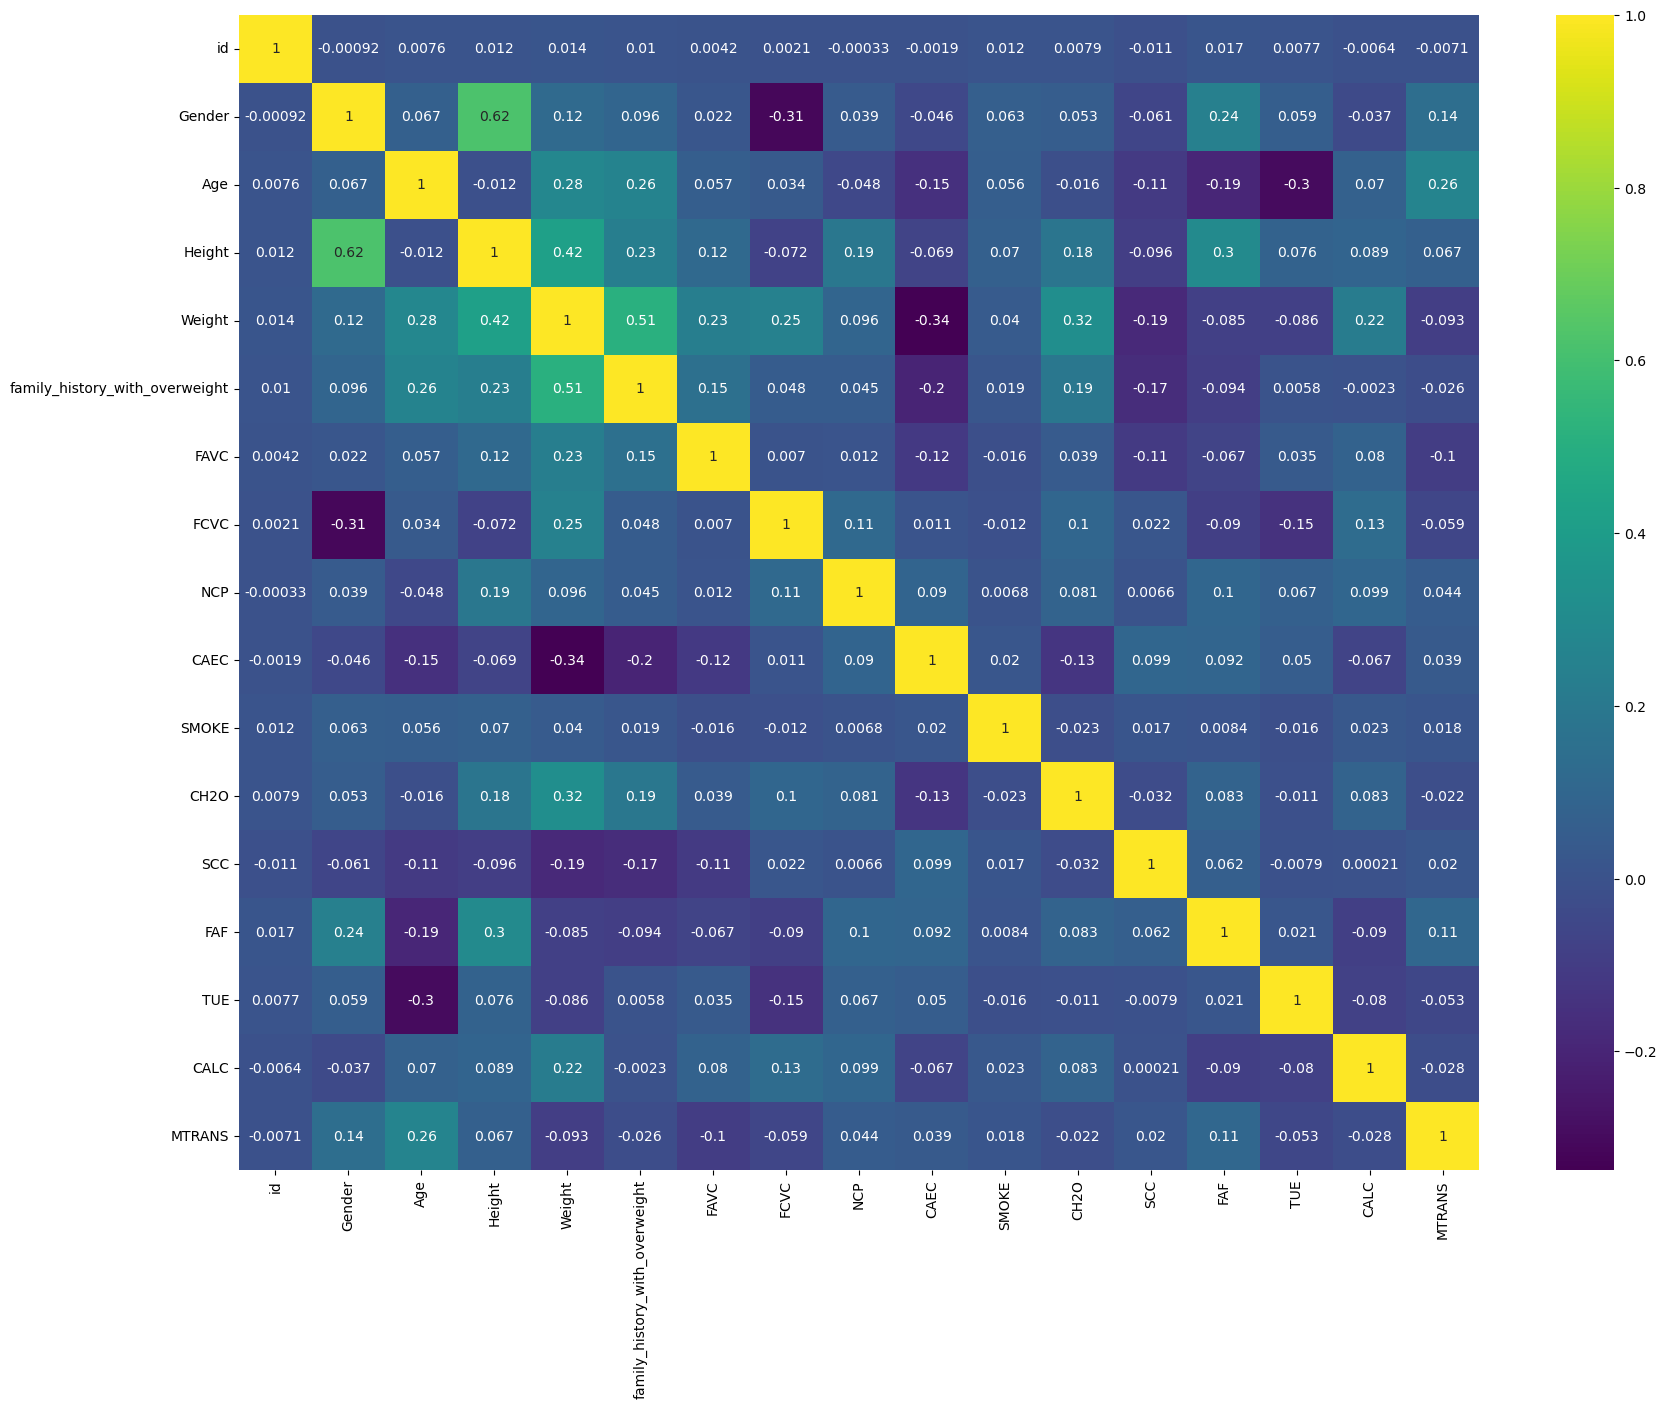

In [31]:
corr = train_df.corr(numeric_only = True)

plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()

There are a few features that are highly coorelated

In [33]:
encoder = OrdinalEncoder(
    categories = [
        [
            'Insufficient_Weight',
            'Normal_Weight',
            'Overweight_Level_I',
            'Overweight_Level_II',
            'Obesity_Type_I',
            'Obesity_Type_II',
            'Obesity_Type_III'
        ]
    ]
)

In [34]:
correlation_data = train_df.copy()

correlation_data['NObeyesdad'] = pd.DataFrame(encoder.fit_transform(correlation_data[['NObeyesdad']]))

corr_matrix = correlation_data.corr(numeric_only = False)['NObeyesdad']

print(corr_matrix.abs().sort_values(ascending=False))

NObeyesdad                        1.000000
Weight                            0.921250
family_history_with_overweight    0.522026
CAEC                              0.364052
Age                               0.356211
CH2O                              0.273154
FCVC                              0.272933
FAF                               0.234745
FAVC                              0.215401
CALC                              0.189361
SCC                               0.184959
Height                            0.150141
TUE                               0.121009
MTRANS                            0.117953
Gender                            0.067699
NCP                               0.027227
id                                0.016240
SMOKE                             0.013501
Name: NObeyesdad, dtype: float64


Weight, family_history_with_overweight, CAEC, Age have a strong to fair coorelation with the target variable

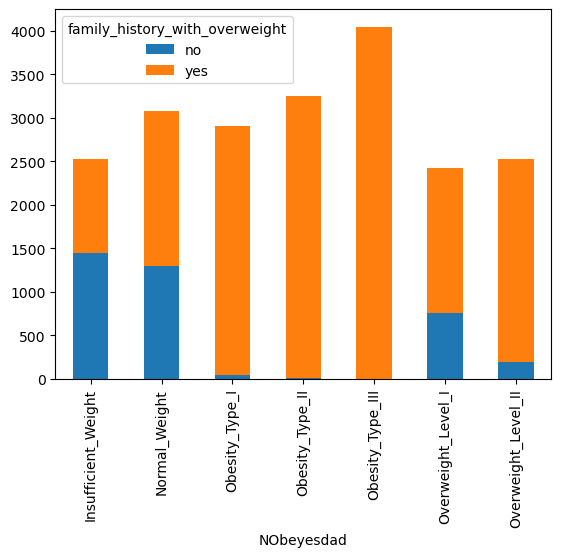

In [35]:
family_df = train_df.groupby('NObeyesdad')['family_history_with_overweight'].value_counts().unstack()
family_df = family_df.rename(index={0: 'no', 1: 'yes'}, columns={0: 'no', 1: 'yes'})

family_df.plot(kind='bar', stacked=True)
plt.show()

People who had family history with overweight, most of them were either Obsere (some level) or Overweight.

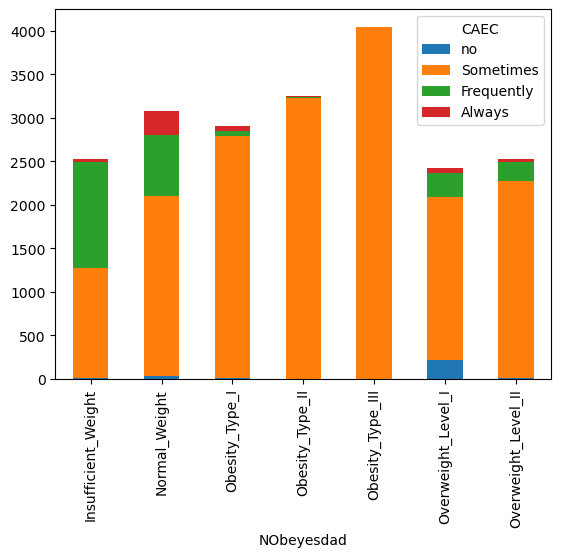

In [36]:
caec_df = train_df.groupby('NObeyesdad')['CAEC'].value_counts().unstack()
caec_df = caec_df.rename(index={0: 'no', 1: 'Sometimes', 2: 'Frequently', 3: 'Always'}, columns={0: 'no', 1: 'Sometimes', 2: 'Frequently', 3: 'Always'})

caec_df.plot(kind='bar', stacked=True)
plt.show()

Although most individuals's food consumption between meals varies greatly, we can see that the majority of obese and overweight persons consume food 'Sometimes'.



But one thing we to keep in mind, is that the family history and even CAEC were concentrated about a specific level.

<Axes: xlabel='NObeyesdad', ylabel='Age'>

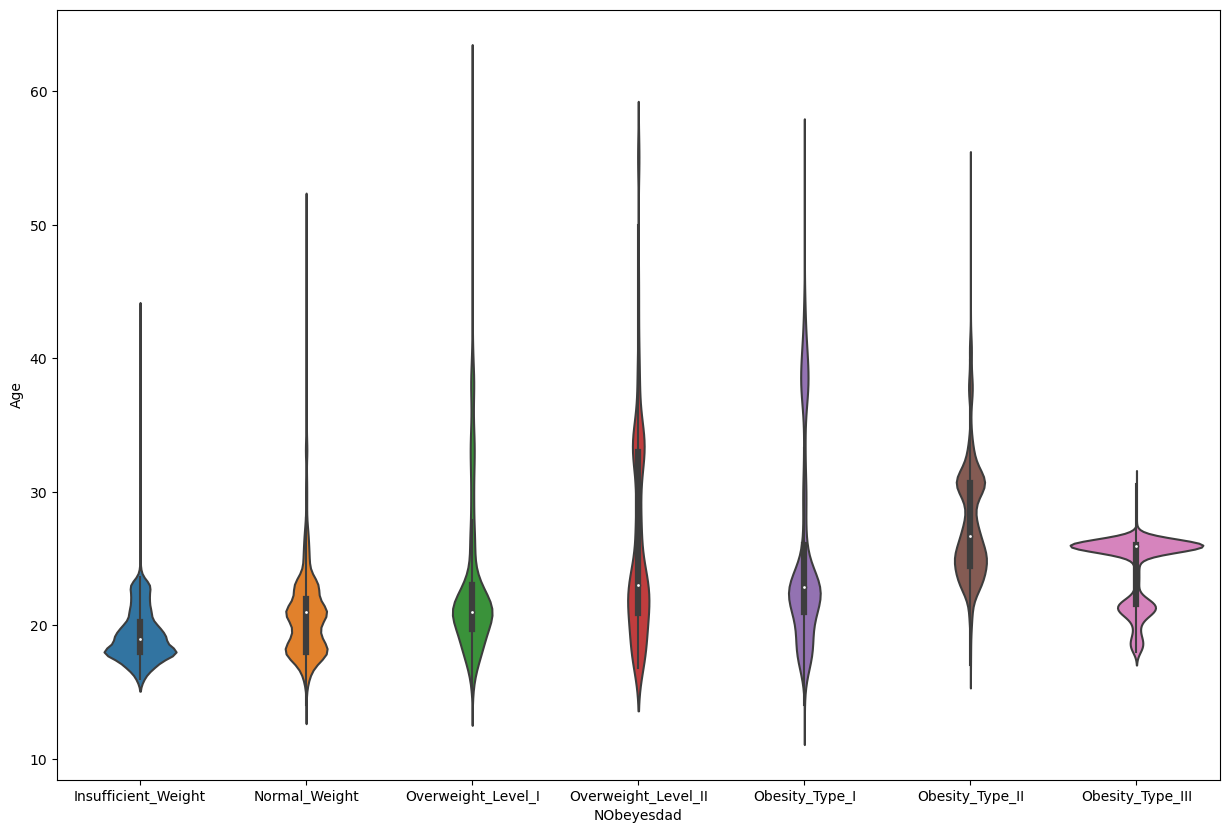

In [38]:
plt.figure(figsize=(15, 10))
sns.violinplot(
    x='NObeyesdad',
    y='Age',
    data=train_df,
    order=[
        'Insufficient_Weight',
        'Normal_Weight',
        'Overweight_Level_I',
        'Overweight_Level_II',
        'Obesity_Type_I',
        'Obesity_Type_II',
        'Obesity_Type_III'
    ]
)

People with Obese Type III are mostly ages around 25

In [40]:
train_df['BMI'] = train_df['Weight'] / (train_df['Height'] ** 2)
test_df['BMI'] = test_df['Weight'] / (test_df['Height'] ** 2)

In [41]:
train_df['BMI'].describe()


count    20758.000000
mean        30.241842
std          8.333932
min         12.868541
25%         24.088223
50%         29.384757
75%         37.011168
max         54.997991
Name: BMI, dtype: float64

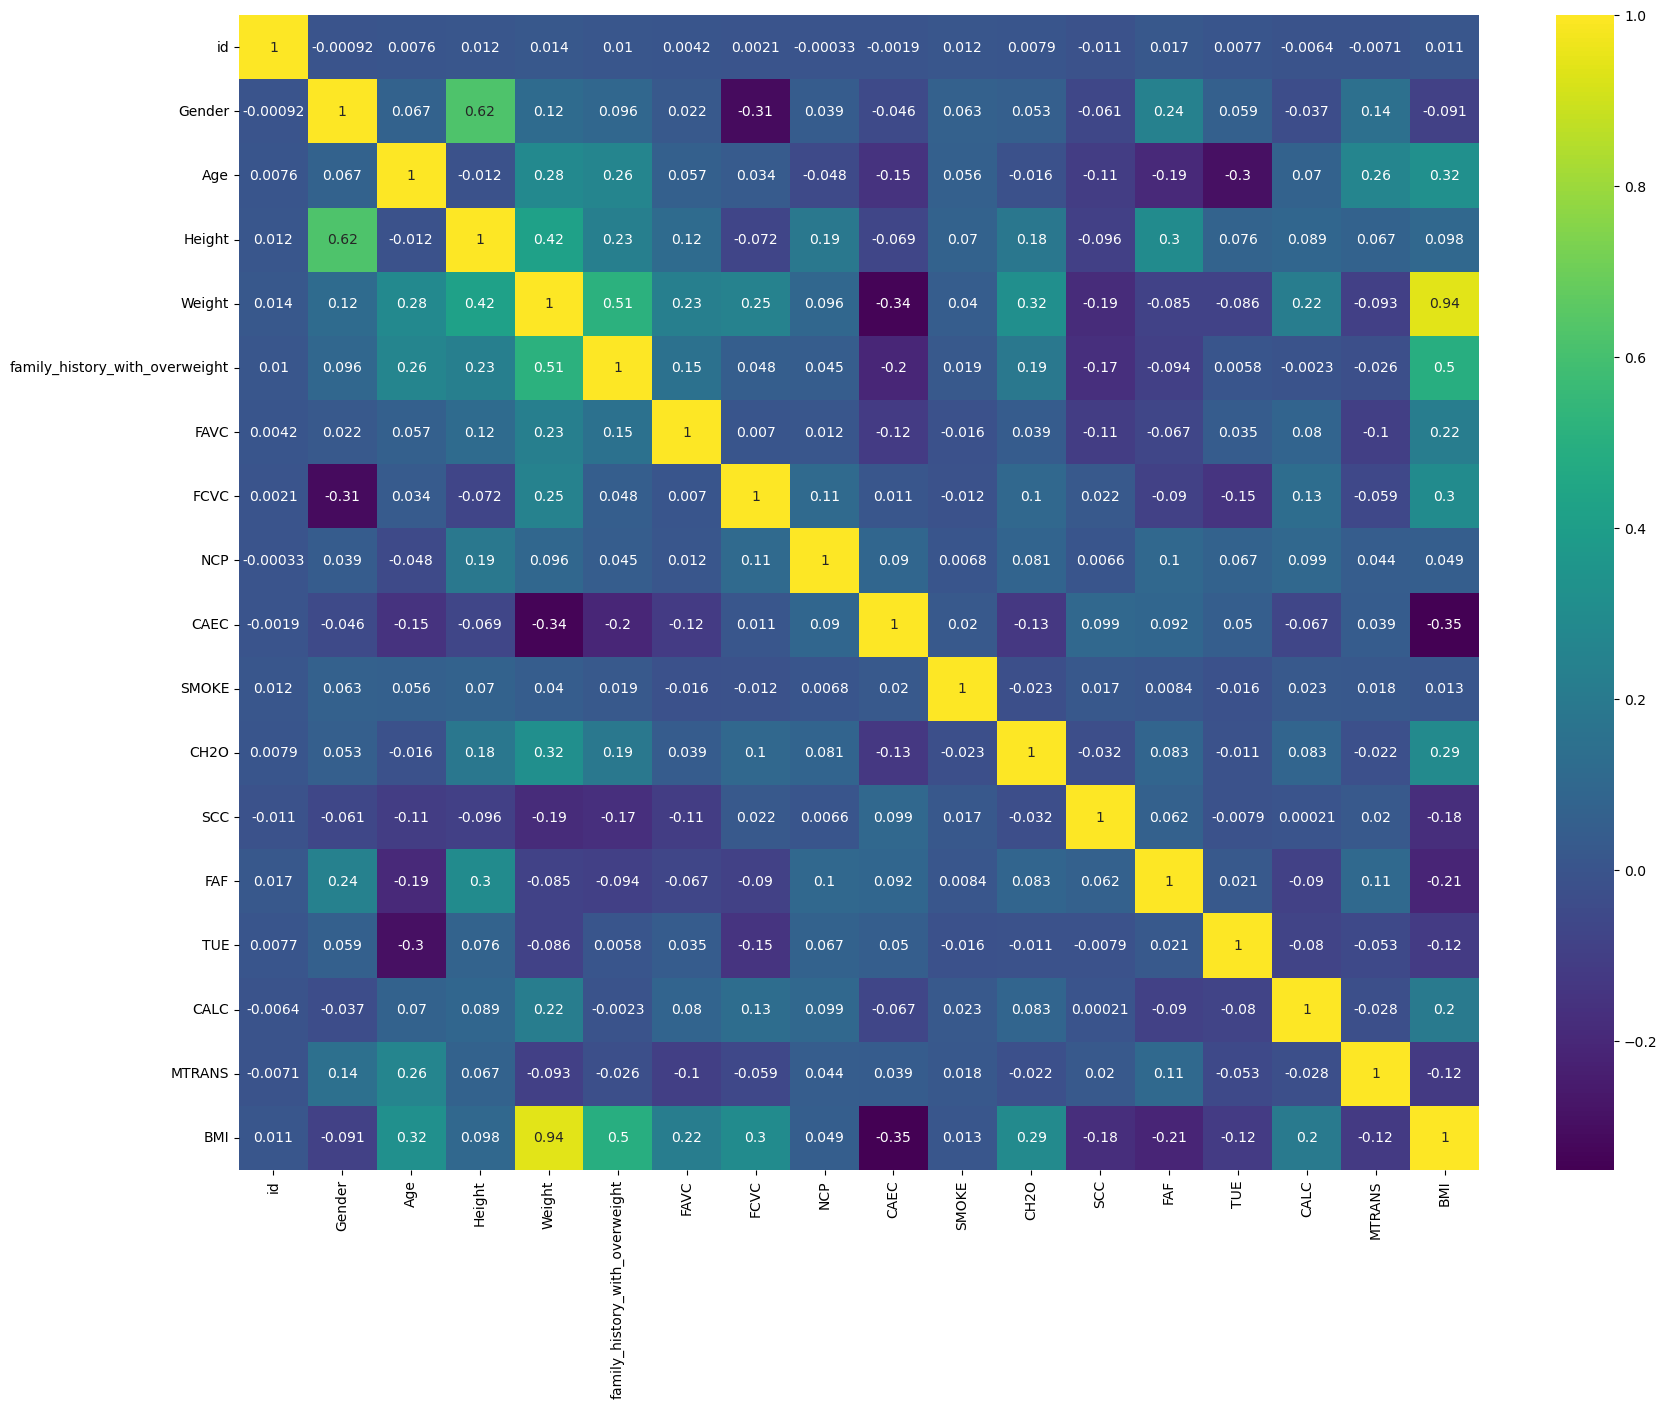

In [42]:
corr = train_df.corr(numeric_only = True)

plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()

In [43]:
train_df.to_csv('modified_train.csv', index=False)
test_df.to_csv('modified_test.csv', index=False)


In [45]:
train_df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,1.0,24.443011,1.699998,81.669950,1.0,1.0,2.000000,2.983297,1.0,0.0,2.763573,0.0,0.000000,0.976473,1.0,0.0,Overweight_Level_II,28.259565
1,1,0.0,18.000000,1.560000,57.000000,1.0,1.0,2.000000,3.000000,2.0,0.0,2.000000,0.0,1.000000,1.000000,0.0,1.0,Normal_Weight,23.422091
2,2,0.0,18.000000,1.711460,50.165754,1.0,1.0,1.880534,1.411685,1.0,0.0,1.910378,0.0,0.866045,1.673584,0.0,0.0,Insufficient_Weight,17.126706
3,3,0.0,20.952737,1.710730,131.274851,1.0,1.0,3.000000,3.000000,1.0,0.0,1.674061,0.0,1.467863,0.780199,1.0,0.0,Obesity_Type_III,44.855798
4,4,1.0,31.641081,1.914186,93.798055,1.0,1.0,2.679664,1.971472,1.0,0.0,1.979848,0.0,1.967973,0.931721,1.0,0.0,Overweight_Level_II,25.599151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,1.0,25.137087,1.766626,114.187096,1.0,1.0,2.919584,3.000000,1.0,0.0,2.151809,0.0,1.330519,0.196680,1.0,0.0,Obesity_Type_II,36.587084
20754,20754,1.0,18.000000,1.710000,50.000000,0.0,1.0,3.000000,4.000000,2.0,0.0,1.000000,0.0,2.000000,1.000000,1.0,0.0,Insufficient_Weight,17.099278
20755,20755,1.0,20.101026,1.819557,105.580491,1.0,1.0,2.407817,3.000000,1.0,0.0,2.000000,0.0,1.158040,1.198439,0.0,0.0,Obesity_Type_II,31.889841
20756,20756,1.0,33.852953,1.700000,83.520113,1.0,1.0,2.671238,1.971472,1.0,0.0,2.144838,0.0,0.000000,0.973834,0.0,1.0,Overweight_Level_II,28.899693


Ready for Model Fitting